In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [5]:
df = pd.read_csv('heart.csv', delimiter=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(df.shape)
print(df.dtypes) # strings in 6th column

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
# preparing data
data_df = df.iloc[:, :13]
class_list = df.iloc[:, 13].tolist()
# colors = ['blue' if cl == 2 else 'red' for cl in class_list]
colors = []
for class_gene in class_list:
    if class_gene == 1:
        colors.append('red')
    else:
        colors.append('blue')
        

In [11]:
def perform_pca(data, number_of_components):
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)

    # performing pca
    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(scaled_data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe
    

In [12]:
def perform_kernel_pca(data, number_of_components):
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)

    # performing kernel pca    
    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(scaled_data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe
    

In [34]:
def display_2d_pca(data, kernel=False):
    if kernel:
        components_dataframe = perform_kernel_pca(data, 2)
    else:
        components_dataframe = perform_pca(data, 2)
    
    plt.figure(figsize=(10, 10))
    plt.scatter(components_dataframe[0], components_dataframe[1], s=3)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    return    
    

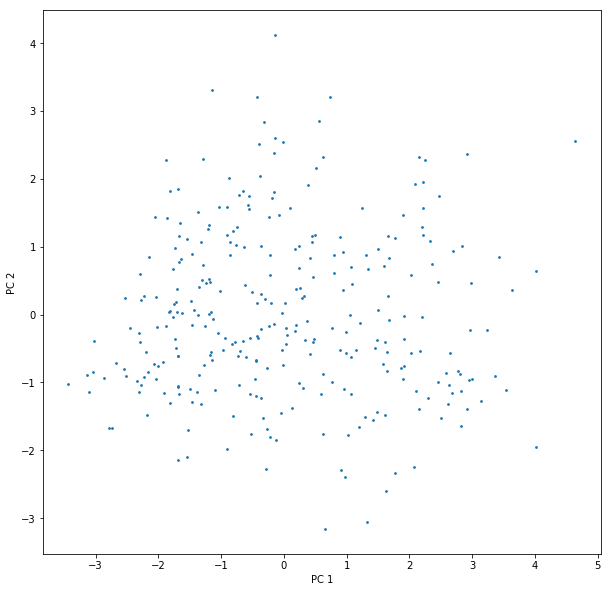

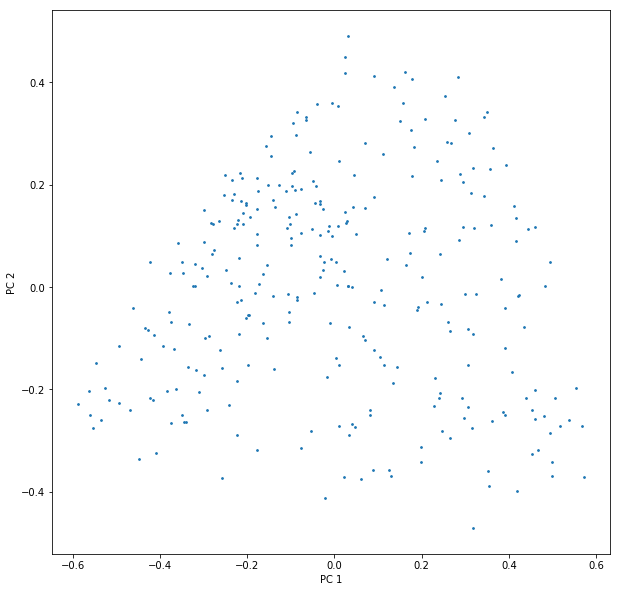

In [35]:
display_2d_pca(data_df)
display_2d_pca(data_df, kernel=True)

In [30]:
def display_2d_pca_with_colors(data, colors, kernel=False):
    if kernel:
        components_dataframe = perform_kernel_pca(data, 2)
    else:
        components_dataframe = perform_pca(data, 2)

    plt.figure(figsize=(10, 10))
    plt.scatter(components_dataframe[0], components_dataframe[1], c=colors, s=3)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    return    

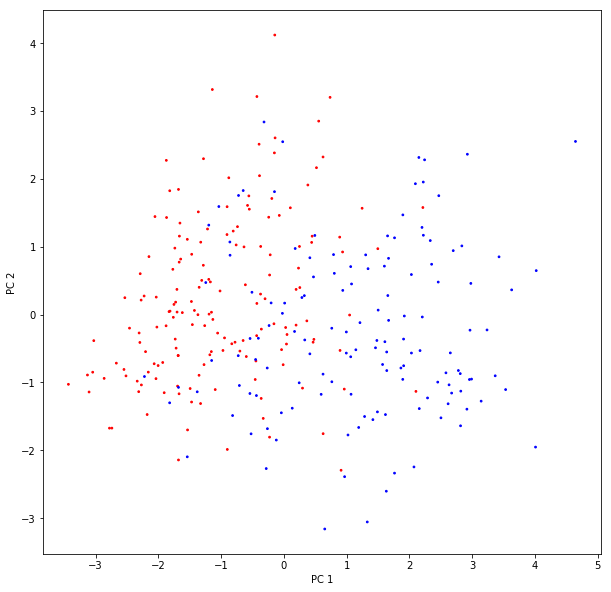

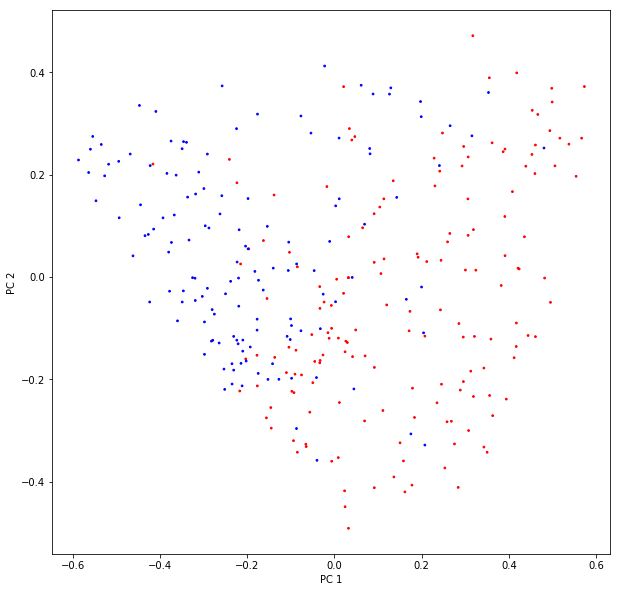

In [31]:
display_2d_pca_with_colors(data_df, colors)
display_2d_pca_with_colors(data_df, colors, kernel=True)

In [32]:
def display_3d_pca(data, kernel=False):
    if kernel:
        components_dataframe = perform_kernel_pca(data, 3)
    else:
        components_dataframe = perform_pca(data, 3)
        
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], s=3);
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    
    plt.show()
    return    


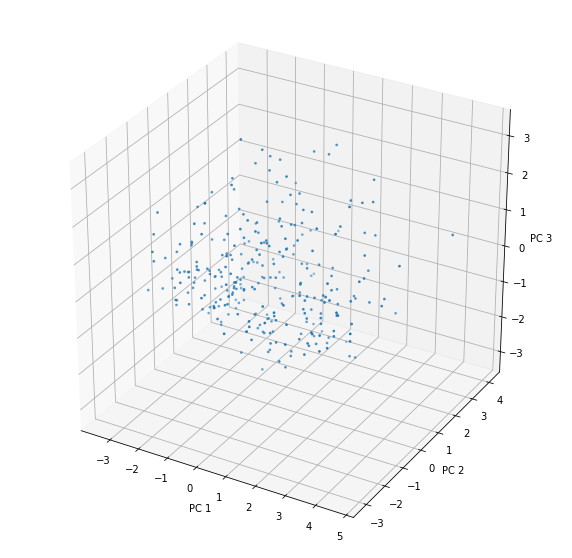

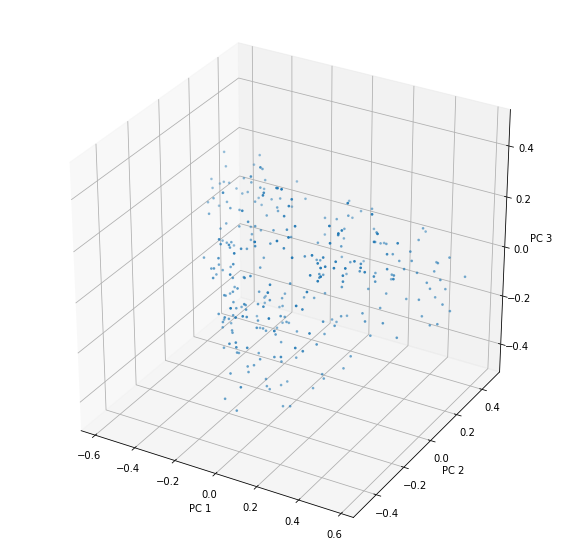

In [33]:
display_3d_pca(data_df)
display_3d_pca(data_df, kernel=True)

In [36]:
def display_3d_pca_with_colors(data, colors, kernel=False):
    if kernel:
        components_dataframe = perform_kernel_pca(data, 3)
    else:
        components_dataframe = perform_pca(data, 3)

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], c=colors, s=3);
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    
    plt.show()
    return    

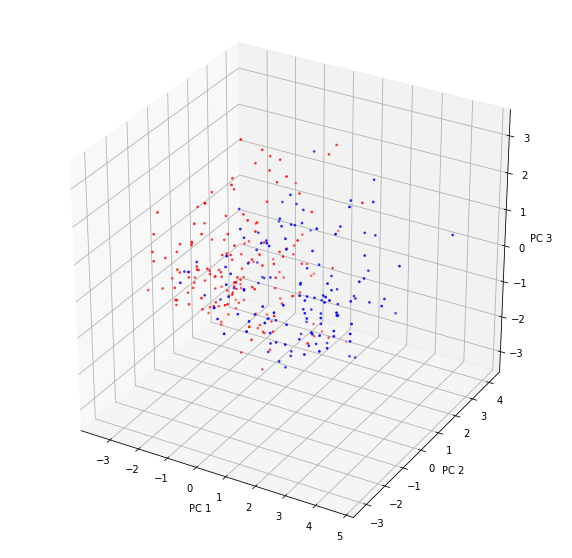

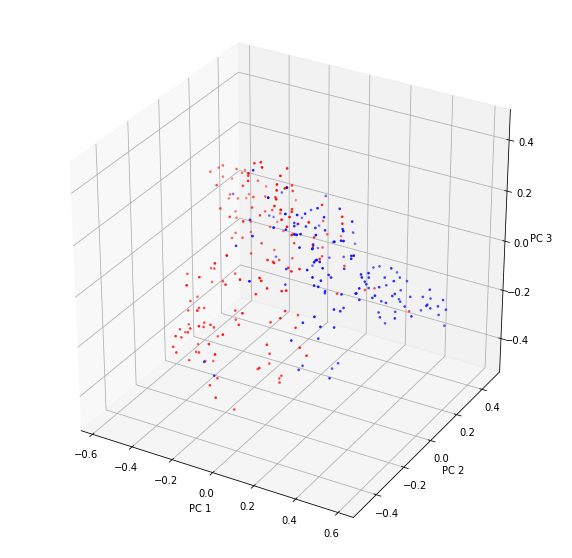

In [37]:
display_3d_pca_with_colors(data_df, colors)
display_3d_pca_with_colors(data_df, colors, kernel=True)

In [23]:
def display_scree_plot(data, kernel=False, number_of_components=None, percentage=True, gamma=None):  
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)
    
    if kernel:
        kpca = KernelPCA(kernel="rbf", gamma=gamma)
        kpca.fit_transform(scaled_data)
        sum_of_variances = sum(kpca.lambdas_)
        bar_heights = kpca.lambdas_[:number_of_components]
        if percentage:
            bar_heights = list(map(lambda x: x * 100 / sum_of_variances, bar_heights))
            plt.ylabel("[%]")
    else:
        pca = PCA(n_components=number_of_components)
        components = pca.fit_transform(scaled_data)
        if percentage:
            bar_heights = pca.explained_variance_ratio_
            bar_heights = list(map(lambda x: x * 100, bar_heights))
            plt.ylabel("[%]")
        else:
            bar_heights = pca.explained_variance_
        

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return
    

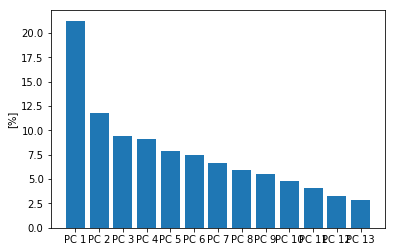

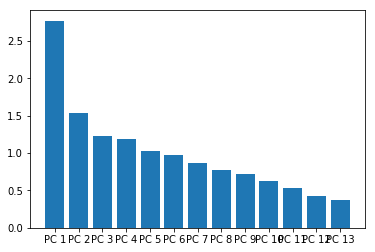

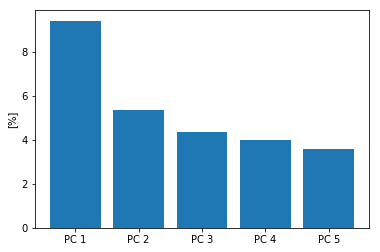

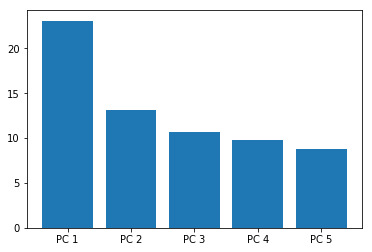

In [24]:
display_scree_plot(data_df)
display_scree_plot(data_df, percentage=False)
display_scree_plot(data_df, kernel=1, number_of_components=5)
display_scree_plot(data_df, kernel=1, number_of_components=5, percentage=False)


# Scree Plot is a graphical representation of the percentages of variation that each PC accounts for

In [7]:
def knn(samples, labels, n_neighbours):
    
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)) / n_neighbours)
        
    return neighbour_stats, distances, indices

In [8]:
stats, dists, ind = knn(filtered.iloc[:, :9].values, filtered.iloc[:, 9].values, 5)
stats = np.array(stats)
np.mean(stats)

0.9674963396778917

In [9]:
rak = [True if cl == 2 else False for cl in filtered['class']]
rak
kek = []
for i, neighbours_list in enumerate(ind):
    kek.append([])
    for neighbour in neighbours_list:
            kek[i].append(rak[neighbour])
kek[:5]



[[True, True, True, True, True],
 [True, False, False, False, False],
 [True, True, True, True, True],
 [True, False, False, False, False],
 [True, True, True, True, True]]

In [10]:
stats[:5]

array([1. , 0.2, 1. , 0.2, 1. ])

In [11]:
ind[:5]

array([[ 95, 545, 263, 197, 521],
       [  1, 173, 319, 303, 151],
       [  2, 308, 117, 638,  76],
       [  3,  54,  47, 412,  53],
       [  4,  46, 234, 191, 648]])

In [12]:
ind[:5]

array([[ 95, 545, 263, 197, 521],
       [  1, 173, 319, 303, 151],
       [  2, 308, 117, 638,  76],
       [  3,  54,  47, 412,  53],
       [  4,  46, 234, 191, 648]])

In [13]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.82842712, 4.        , 4.12310563, 4.47213595],
       [0.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 4.47213595, 4.69041576, 4.89897949, 5.56776436],
       [0.        , 0.        , 1.41421356, 1.41421356, 1.41421356]])

In [14]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.82842712, 4.        , 4.12310563, 4.47213595],
       [0.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 4.47213595, 4.69041576, 4.89897949, 5.56776436],
       [0.        , 0.        , 1.41421356, 1.41421356, 1.41421356]])

In [15]:
scaled = StandardScaler().fit_transform(filtered.iloc[:, :9].values)
scaled

/home/jakub/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jakub/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [16]:
stats, dists, ind = knn(scaled, filtered.iloc[:, 9].values, 10)
stats = np.array(stats)
np.mean(stats)

0.958125915080527

In [17]:
ind[:5]

array([[545,   0, 197, 521, 263,  95, 546,  80, 666, 522],
       [  1, 173, 303, 142, 319,  84, 109, 121,  56, 151],
       [  2, 188, 382, 271, 308, 125, 638, 250, 651, 162],
       [  3,  54,  47, 412, 251,  53, 247, 675,  44, 221],
       [  4,  46, 191,  79, 487, 648, 238, 234, 655, 435]])

In [18]:
pca = PCA(n_components=2)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp)
comp_df.head()

,0,1
0,-1.470171,-0.104273
1,1.442046,-0.570141
2,-1.592478,-0.076120
3,1.479812,-0.528452
4,-1.344862,-0.090719


In [19]:
pca = PCA(n_components=9)
pca.fit_transform(scaled)
bar_height = pca.explained_variance_ratio_
print(bar_height)
np.sum(bar_height)

[0.65549993 0.08621632 0.05991692 0.05106972 0.04225287 0.03354183
 0.03271141 0.02897065 0.00982036]


1.0

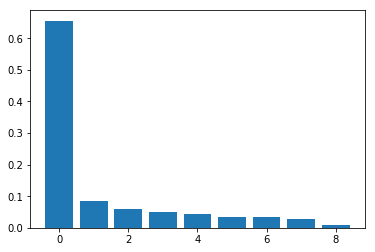

In [20]:
plt.bar(np.arange(9), bar_height)
plt.show()

In [21]:
stats, dists, ind = knn(comp_df.values, filtered.iloc[:, 9].values, 10)
np.array(stats)
np.mean(stats)

0.9597364568081991

In [22]:
comp_df['class'] = filtered['class'].values
comp_df.head()

,0,1,class
0,-1.470171,-0.104273,2
1,1.442046,-0.570141,2
2,-1.592478,-0.076120,2
3,1.479812,-0.528452,2
4,-1.344862,-0.090719,2


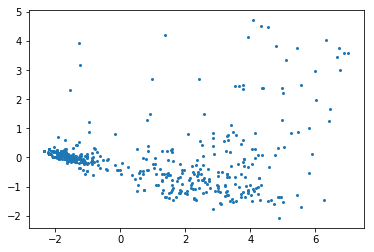

In [23]:
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], s=4)

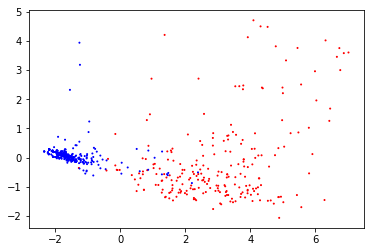

In [24]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df['class']]
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], c=colors, s=1)

In [25]:
kpca = KernelPCA(kernel="rbf", n_components=2)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['principal component 1', 'principal component 2'])
comp_df2.head()

,principal component 1,principal component 2
0,0.324448,0.279847
1,-0.532380,0.165591
2,0.384024,0.029997
3,-0.531882,0.151138
4,0.322221,0.177062


In [26]:
comp_df2['class'] = filtered['class'].values
comp_df2.head()

,principal component 1,principal component 2,class
0,0.324448,0.279847,2
1,-0.532380,0.165591,2
2,0.384024,0.029997,2
3,-0.531882,0.151138,2
4,0.322221,0.177062,2


In [27]:
stats, dists, ind = knn(comp_df2.values, filtered.iloc[:, 9].values, 5)
stats = np.array(stats)
np.mean(stats)

1.0

In [28]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01446177, 0.03455634, 0.05848812, 0.10344544],
       [0.        , 0.00293393, 0.00861998, 0.01062986, 0.01107697],
       [0.        , 0.01446177, 0.04878671, 0.05597761, 0.11700818],
       [0.        , 0.        , 0.0200575 , 0.02175245, 0.02371444]])

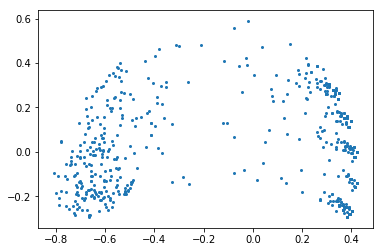

In [29]:
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], s=4)
plt.show()

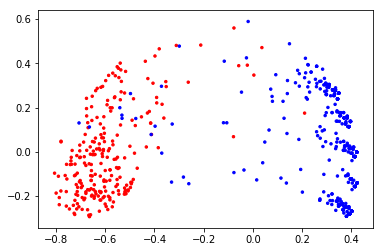

In [30]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df2['class']]
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], c=colors, s=6)

<IPython.core.display.Javascript object>


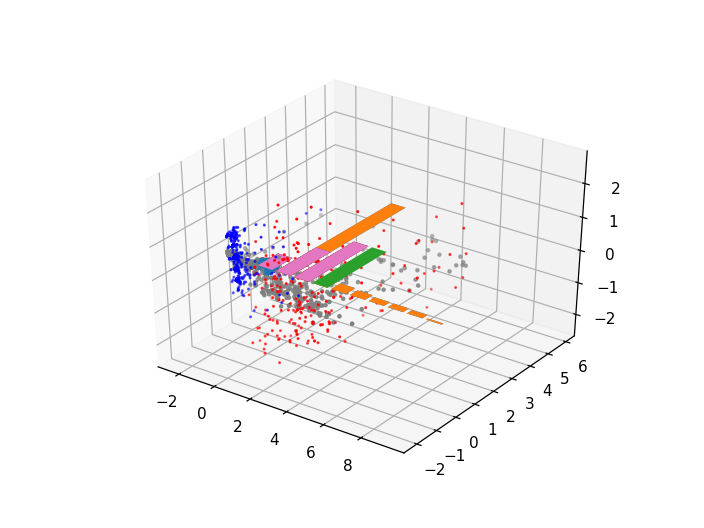

In [69]:
%matplotlib notebook



pca = PCA(n_components=3)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df.iloc[:, 0], comp_df.iloc[:, 1], comp_df.iloc[:, 2], c=colors, s=1);

<IPython.core.display.Javascript object>


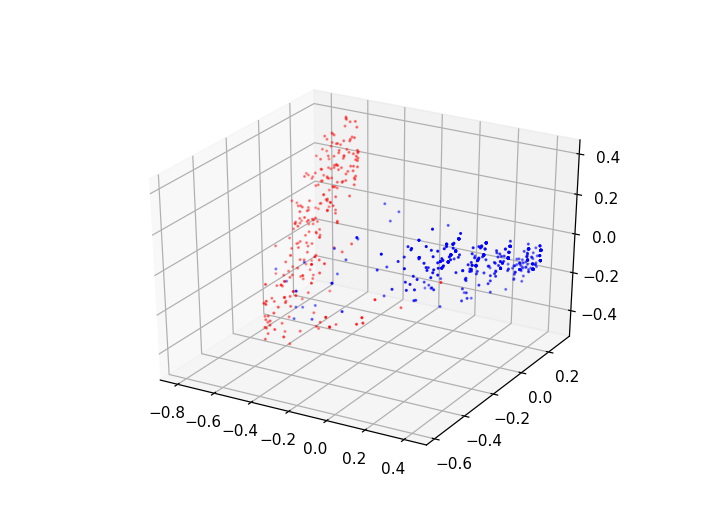

In [31]:
%matplotlib notebook

kpca = KernelPCA(kernel="rbf", n_components=3)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], comp_df2.iloc[:, 2], c=colors, s=1);